In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DEqMS")

Warning message:
"package 'BiocManager' was built under R version 4.2.2"
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.0 (2022-04-22 ucrt)

Installing package(s) 'DEqMS'



package 'DEqMS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Osnat\AppData\Local\Temp\RtmpyevTTR\downloaded_packages


Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.2.0/library
  packages:
    boot, class, cluster, codetools, foreign, MASS, mgcv, nlme, nnet, rpart,
    spatial, survival

Old packages: 'BH', 'BiasedUrn', 'bibliometrix', 'BiocFileCache',
  'BiocManager', 'BiocParallel', 'bit', 'broom', 'bslib', 'cachem', 'callr',
  'car', 'cli', 'colorspace', 'commonmark', 'cpp11', 'crayon', 'curl',
  'data.table', 'dbplyr', 'DelayedArray', 'DESeq2', 'digest', 'dplyr', 'DT',
  'dtplyr', 'e1071', 'edgeR', 'emmeans', 'evaluate', 'FactoMineR', 'fansi',
  'fastmap', 'fontawesome', 'forcats', 'formatR', 'fs', 'gargle',
  'GenomeInfoDb', 'GenomicFeatures', 'GenomicRanges', 'ggmap', 'ggplot2',
  'ggpubr', 'ggrepel', 'ggsignif', 'haven', 'highr', 'htmltools',
  'htmlwidgets', 'httpuv', 'httr', 'igraph', 'IRkernel', 'isoband', 'jpeg',
  'jsonlite', 'kernlab', 'knitr', 'lifecycle', 'limma', 'lme4', 'locfit',
  'lpSolve', 'lubridate', 'maps', 'maptools', 'Matrix', 'minqa

In [2]:
url <- "https://ftp.ebi.ac.uk/pride-archive/2016/06/PXD004163/Yan_miR_Protein_table.flatprottable.txt"
download.file(url, destfile = "./miR_Proteintable.txt",method = "auto")

df.prot = read.table("miR_Proteintable.txt",stringsAsFactors = FALSE,
                     header = TRUE, quote = "", comment.char = "",sep = "\t")

In [3]:
library(DEqMS)

Warning message:
"package 'DEqMS' was built under R version 4.2.1"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.1"
Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.2"
Loading required package: limma

Warning message:
"package 'limma' was built under R version 4.2.1"


In [4]:
df.prot

Protein.accession,Gene,Associated.gene.ID,Description,Coverage,X..Proteins,Proteins.in.group,miR.FASP_..Unique.peptides,miR.FASP_..Peptides,miR.FASP_..PSMs,⋯,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129N.....quanted.PSMs,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_129C.....quanted.PSMs,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130N.....quanted.PSMs,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_130C.....quanted.PSMs,miR.FASP_tmt10plex_131,miR.FASP_tmt10plex_131.....quanted.PSMs
<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
A2M,NA,ENSG00000175899,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:HGNC:7],NA,na,NA,8,9,12,⋯,0.8269960,11,0.7601787,11,0.9170174,11,0.8545436,11,0.6034764,11
A2ML1,NA,ENSG00000166535,alpha-2-macroglobulin-like 1 [Source:HGNC Symbol;Acc:HGNC:23336],NA,na,NA,1,1,1,⋯,0.9976961,1,1.2686841,1,1.1331769,1,1.3361156,1,1.1255814,1
AAAS,NA,ENSG00000094914,"achalasia, adrenocortical insufficiency, alacrimia [Source:HGNC Symbol;Acc:HGNC:13666]",NA,na,NA,6,6,11,⋯,0.8474254,11,0.9044735,11,1.1462708,11,0.9201587,11,1.0190892,11
AACS,NA,ENSG00000081760,acetoacetyl-CoA synthetase [Source:HGNC Symbol;Acc:HGNC:21298],NA,na,NA,10,10,14,⋯,0.8878470,14,1.0020848,14,1.0606251,14,0.9536617,14,0.9506161,14
AAED1,NA,ENSG00000158122,AhpC/TSA antioxidant enzyme domain containing 1 [Source:HGNC Symbol;Acc:HGNC:16881],NA,na,NA,2,2,4,⋯,1.0751808,4,1.0296678,4,1.0646601,4,1.0366690,4,1.2450713,4
AAGAB,NA,ENSG00000103591,alpha- and gamma-adaptin binding protein [Source:HGNC Symbol;Acc:HGNC:25662],NA,na,NA,5,5,10,⋯,1.0637393,10,0.9120212,10,0.9120529,10,1.0656559,10,1.0849826,10
AAK1,NA,ENSG00000115977,AP2 associated kinase 1 [Source:HGNC Symbol;Acc:HGNC:19679],NA,na,NA,31,32,67,⋯,1.0346318,65,1.1678986,64,1.0293387,66,0.9911412,66,0.9885753,66
AAMDC,NA,ENSG00000087884,"adipogenesis associated, Mth938 domain containing [Source:HGNC Symbol;Acc:HGNC:30205]",NA,na,NA,1,1,4,⋯,1.0200452,4,0.9954907,4,0.9490870,4,1.0834913,4,1.0137882,4
AAMP,NA,ENSG00000127837,"angio-associated, migratory cell protein [Source:HGNC Symbol;Acc:HGNC:18]",NA,na,NA,12,12,36,⋯,1.0965335,36,0.9936884,36,0.9821960,36,1.0064399,36,1.1058199,36


In [5]:
names(df.prot)

[1] "Protein.accession"                       
 [2] "Gene"                                    
 [3] "Associated.gene.ID"                      
 [4] "Description"                             
 [5] "Coverage"                                
 [6] "X..Proteins"                             
 [7] "Proteins.in.group"                       
 [8] "miR.FASP_..Unique.peptides"              
 [9] "miR.FASP_..Peptides"                     
[10] "miR.FASP_..PSMs"                         
[11] "miR.FASP_Protein.error.probability"      
[12] "miR.FASP_q.value"                        
[13] "miR.FASP_PEP"                            
[14] "miR.FASP_MS1.precursor.area"             
[15] "miR.FASP_tmt10plex_126"                  
[16] "miR.FASP_tmt10plex_126.....quanted.PSMs" 
[17] "miR.FASP_tmt10plex_127N"                 
[18] "miR.FASP_tmt10plex_127N.....quanted.PSMs"
[19] "miR.FASP_tmt10plex_127C"                 
[20] "miR.FASP_tmt10plex_127C.....quanted.PSMs"
[21] "miR.FASP_tmt10plex_128N"                 
[22] "miR.FASP_tmt10plex_128N.....quanted.PSMs"
[23] "miR.FASP_tmt10plex_128C"                 
[24] "miR.FASP_tmt10plex_128C.....quanted.PSMs"
[25] "miR.FASP_tmt10plex_129N"                 
[26] "miR.FASP_tmt10plex_129N.....quanted.PSMs"
[27] "miR.FASP_tmt10plex_129C"                 
[28] "miR.FASP_tmt10plex_129C.....quanted.PSMs"
[29] "miR.FASP_tmt10plex_130N"                 
[30] "miR.FASP_tmt10plex_130N.....quanted.PSMs"
[31] "miR.FASP_tmt10plex_130C"                 
[32] "miR.FASP_tmt10plex_130C.....quanted.PSMs"
[33] "miR.FASP_tmt10plex_131"                  
[34] "miR.FASP_tmt10plex_131.....quanted.PSMs"

In [6]:
# filter at 1% protein FDR and extract TMT quantifications
TMT_columns = seq(15,33,2)
dat = df.prot[df.prot$miR.FASP_q.value<0.01,TMT_columns]
rownames(dat) = df.prot[df.prot$miR.FASP_q.value<0.01,]$Protein.accession
# The protein dataframe is a typical protein expression matrix structure
# Samples are in columns, proteins are in rows
# use unique protein IDs for rownames
# to view the whole data frame, use the command View(dat)

In [8]:
dat.log = log2(dat)
#remove rows with NAs
dat.log = na.omit(dat.log)

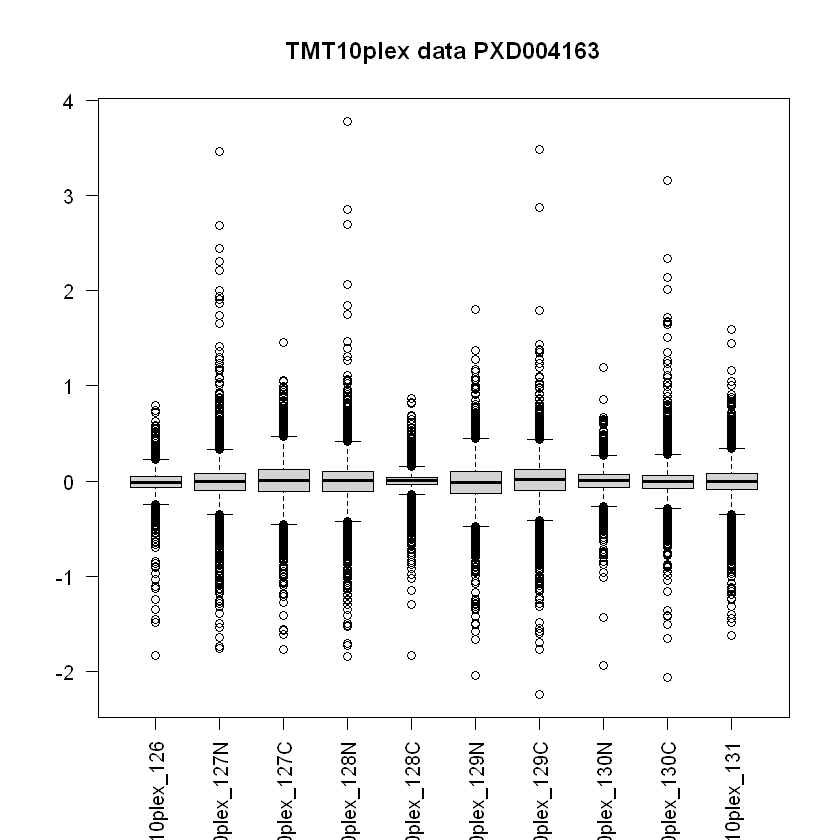

In [9]:
boxplot(dat.log,las=2,main="TMT10plex data PXD004163")

In [10]:
# if there is only one factor, such as treatment. You can define a vector with
# the treatment group in the same order as samples in the protein table.
cond = as.factor(c("ctrl","miR191","miR372","miR519","ctrl",
"miR372","miR519","ctrl","miR191","miR372"))

# The function model.matrix is used to generate the design matrix
design = model.matrix(~0+cond) # 0 means no intercept for the linear model
colnames(design) = gsub("cond","",colnames(design))

In [11]:
design

,ctrl,miR191,miR372,miR519
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,1,0,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0
10,0,0,1,0


In [12]:
# you can define one or multiple contrasts here
x <- c("miR372-ctrl","miR519-ctrl","miR191-ctrl",
       "miR372-miR519","miR372-miR191","miR519-miR191")
contrast =  makeContrasts(contrasts=x,levels=design)
fit1 <- lmFit(dat.log, design)
fit2 <- contrasts.fit(fit1,contrasts = contrast)
fit3 <- eBayes(fit2)

In [13]:
# assign a extra variable `count` to fit3 object, telling how many PSMs are 
# quantifed for each protein
library(matrixStats)
count_columns = seq(16,34,2)
psm.count.table = data.frame(count = rowMins(
  as.matrix(df.prot[,count_columns])), row.names =  df.prot$Protein.accession)
fit3$count = psm.count.table[rownames(fit3$coefficients),"count"]
fit4 = spectraCounteBayes(fit3)

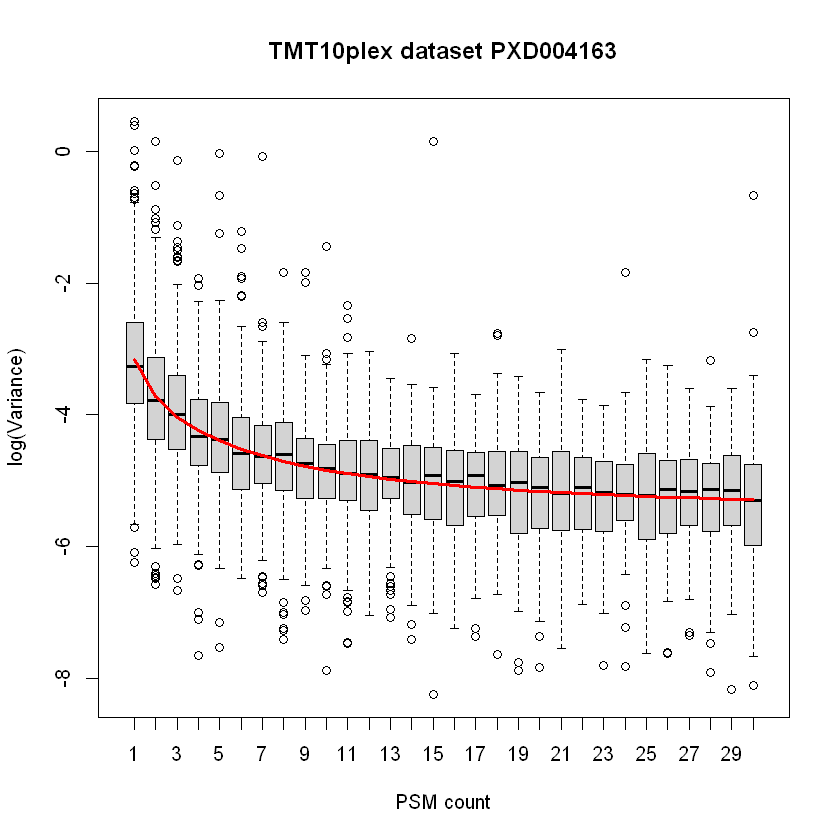

In [20]:
# n=30 limits the boxplot to show only proteins quantified by <= 30 PSMs.
VarianceBoxplot(fit4,n=30,main="TMT10plex dataset PXD004163",xlab="PSM count")

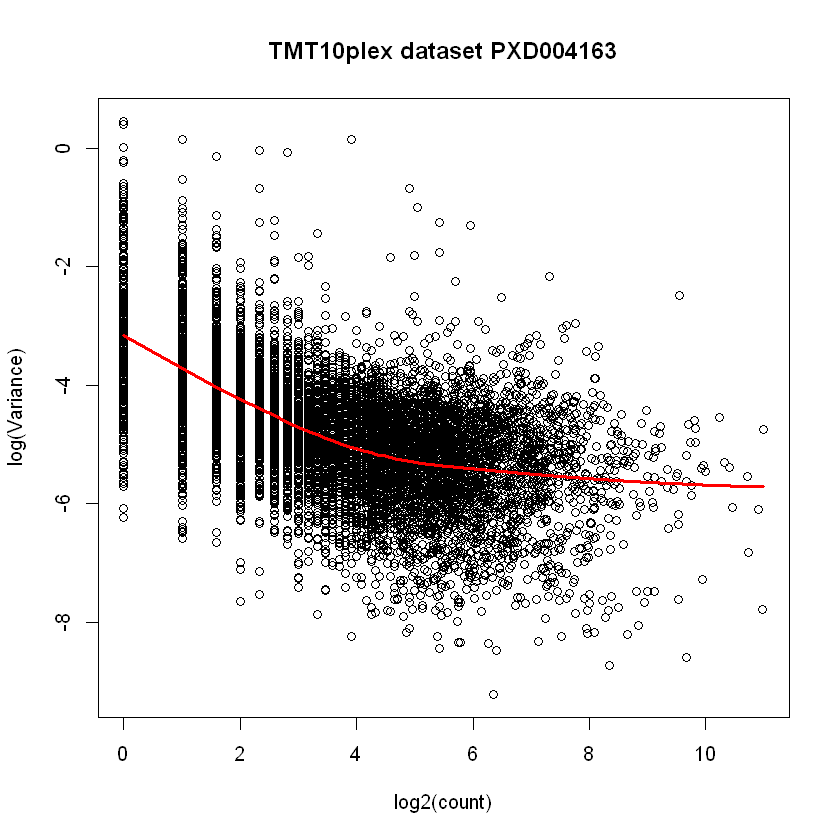

In [21]:
VarianceScatterplot(fit4,main="TMT10plex dataset PXD004163")

In [22]:
DEqMS.results = outputResult(fit4,coef_col = 1)
#if you are not sure which coef_col refers to the specific contrast,type
head(fit4$coefficients)

,miR372-ctrl,miR519-ctrl,miR191-ctrl,miR372-miR519,miR372-miR191,miR519-miR191
A2M,-0.49200598,-0.36004725,-0.29168559,-0.13195872,-0.2003203925,-0.0683616685
AAAS,-0.10579819,-0.16658093,-0.12904503,0.06078273,0.0232468358,-0.0375358970
AACS,-0.06426210,-0.01691172,-0.06517334,-0.04735038,0.0009112413,0.0482616247
AAED1,0.28361527,0.11312650,0.11297711,0.17048876,0.1706381600,0.0001493955
AAGAB,0.06942315,-0.02252727,0.18841027,0.09195042,-0.1189871230,-0.2109375393
AAK1,0.01017744,0.19826414,-0.03174740,-0.18808671,0.0419248388,0.2300115440


In [23]:
head(DEqMS.results)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,count,sca.t,sca.P.Value,sca.adj.pval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
ANKRD52,-1.2510508,-0.5579726,-22.87106,1.526501e-09,1.317828e-05,11.285532,ANKRD52,17,-22.52489,2.604115e-11,2.248132e-07
CROT,-1.2470819,-0.4499388,-14.12934,1.237413e-07,3.560861e-04,8.042317,CROT,22,-15.37439,2.364669e-09,1.020709e-05
PDCD4,-0.7673770,-0.2662663,-13.42734,1.954766e-07,4.218875e-04,7.652462,PDCD4,40,-14.40705,5.027631e-09,1.446785e-05
ATAD2,-0.6719598,-0.4584266,-11.76618,6.328104e-07,5.129415e-04,6.614667,ATAD2,51,-12.75244,2.042809e-08,4.074288e-05
RELA,-0.6208005,-0.2296114,-12.08909,4.980318e-07,5.129415e-04,6.830220,RELA,32,-12.59211,2.359717e-08,4.074288e-05
ZKSCAN1,-0.8846205,-0.5034830,-12.41816,3.924351e-07,5.129415e-04,7.042732,ZKSCAN1,10,-12.15065,3.539633e-08,4.746132e-05


Warning message:
"package 'ggrepel' was built under R version 4.2.1"
Warning message:
"It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead."


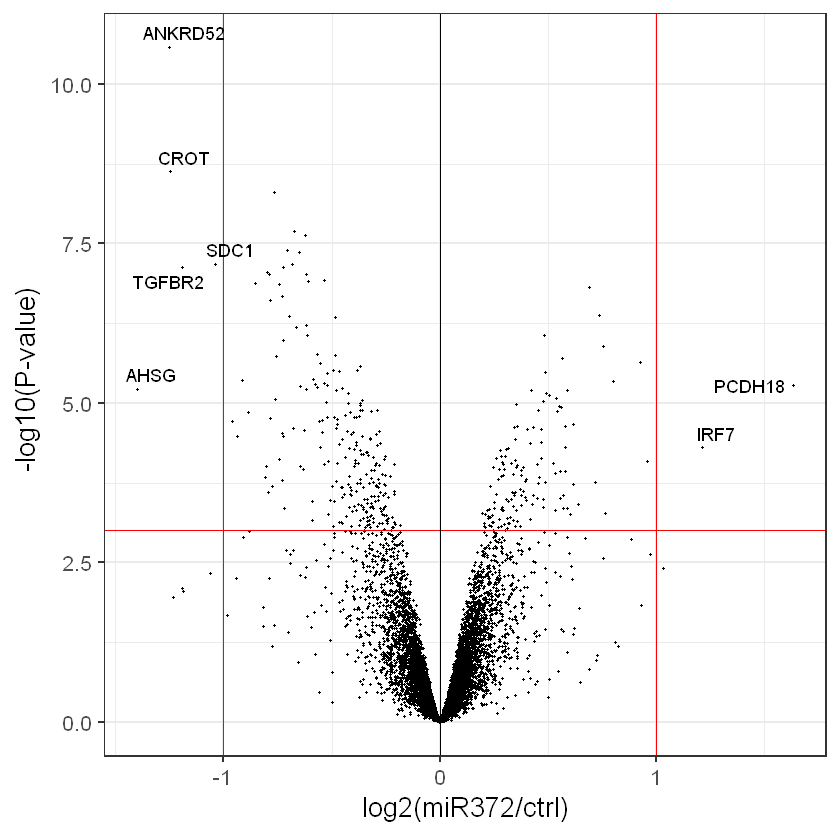

In [24]:
library(ggrepel)
# Use ggplot2 allows more flexibility in plotting

DEqMS.results$log.sca.pval = -log10(DEqMS.results$sca.P.Value)
ggplot(DEqMS.results, aes(x = logFC, y =log.sca.pval )) + 
    geom_point(size=0.5 )+
    theme_bw(base_size = 16) + # change theme
    xlab(expression("log2(miR372/ctrl)")) + # x-axis label
    ylab(expression(" -log10(P-value)")) + # y-axis label
    geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_gradient(low = "black", high = "black", guide = FALSE)+
    geom_text_repel(data=subset(DEqMS.results, abs(logFC)>1&log.sca.pval > 3),
                    aes( logFC, log.sca.pval ,label=gene)) # add gene la

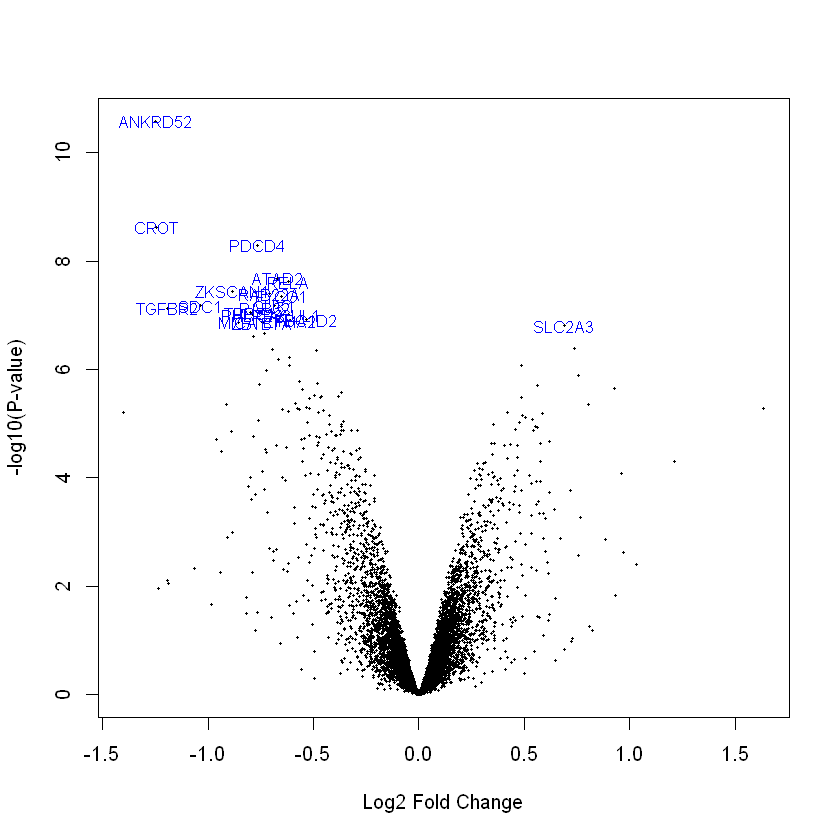

In [25]:
fit4$p.value = fit4$sca.p
# volcanoplot highlight top 20 proteins ranked by p-value here
volcanoplot(fit4,coef=1, style = "p-value", highlight = 20,
            names=rownames(fit4$coefficients))



In [26]:
url2 <- "https://ftp.ebi.ac.uk/pride-archive/2014/09/PXD000279/proteomebenchmark.zip"
download.file(url2, destfile = "./PXD000279.zip",method = "auto")
unzip("PXD000279.zip")

In [27]:
df.prot0 = read.table("proteinGroups.txt",header=T,sep="\t",stringsAsFactors = F,
                        comment.char = "",quote ="")


# remove decoy matches and matches to contaminant
df.prot = df.prot0[!df.prot0$Reverse=="+",]
df.prot = df.prot[!df.prot$Contaminant=="+",]

# Extract columns of LFQ intensites
df.LFQ = df.prot[,89:94]
df.LFQ[df.LFQ==0] <- NA

rownames(df.LFQ) = df.prot$Majority.protein.IDs
df.LFQ$na_count_H = apply(df.LFQ,1,function(x) sum(is.na(x[1:3])))
df.LFQ$na_count_L = apply(df.LFQ,1,function(x) sum(is.na(x[4:6])))
# Filter protein table. DEqMS require minimum two values for each group.
df.LFQ.filter = df.LFQ[df.LFQ$na_count_H<2 & df.LFQ$na_count_L<2,1:6]

In [33]:
t(head(df.prot0))

,1,2,3,4,5,6
Protein.IDs,A0AV96;B7Z8Z7;A0AV96-2;D6R9D6;D6RBS9;D6REZ6;D6RA49;D6RFL5;D6R9M7;D6RBP6;D6RCT1;Q5T0W7;B3KWU8;B4DZ27;Q9NQ94-5;Q8TBY0;Q9NQ94-6;Q9NQ94-3;C9JGD3;Q9NQ94-2;F8W9F8;Q9NQ94-4;Q9NQ94,A0AVT1;A0AVT1-2;H0Y8S8;A0AVT1-4;A0AVT1-3,H7BXI1;A0FGR8-6;A0FGR8-2;A0FGR8;C9JGI7;A0FGR8-4;F2Z3K9;A0FGR8-5;A6NFV7,A0JLT2;A0JLT2-2,A0JNW5,A0MZ66-4;A0MZ66;A0MZ66-3;B7Z7Z9;A0MZ66-5;A0MZ66-6;A0MZ66-2;A0MZ66-7
Majority.protein.IDs,A0AV96;B7Z8Z7;A0AV96-2;D6R9D6,A0AVT1;A0AVT1-2,H7BXI1;A0FGR8-6;A0FGR8-2;A0FGR8;C9JGI7;A0FGR8-4,A0JLT2;A0JLT2-2,A0JNW5,A0MZ66-4;A0MZ66;A0MZ66-3;B7Z7Z9;A0MZ66-5;A0MZ66-6;A0MZ66-2
Peptide.counts..all.,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,14;11;4;3;3,11;11;10;10;7;7;4;4;2,4;2,1,7;7;7;6;6;6;5;2
Peptide.counts..razor.unique.,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,14;11;4;3;3,11;11;10;10;7;7;4;4;2,4;2,1,7;7;7;6;6;6;5;2
Peptide.counts..unique.,13;12;11;9;6;5;4;4;4;3;1;1;1;1;1;1;1;1;1;1;1;1;1,14;11;4;3;3,11;11;10;10;7;7;4;4;2,4;2,1,7;7;7;6;6;6;5;2
Protein.names,RNA-binding protein 47,Ubiquitin-like modifier-activating enzyme 6,Extended synaptotagmin-2,Mediator of RNA polymerase II transcription subunit 19,UHRF1-binding protein 1-like,Shootin-1
Gene.names,RBM47,UBA6,ESYT2,MED19,UHRF1BP1L,KIAA1598
Fasta.headers,>sp|A0AV96|RBM47_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=1 SV=2;>tr|B7Z8Z7|B7Z8Z7_HUMAN RNA-binding protein 47 OS=Homo sapiens GN=RBM47 PE=2 SV=1;>sp|A0AV96-2|RBM47_HUMAN Isoform 2 of RNA-binding protein 47 OS=Homo sapiens GN=RBM47;>tr|D6R,>sp|A0AVT1|UBA6_HUMAN Ubiquitin-like modifier-activating enzyme 6 OS=Homo sapiens GN=UBA6 PE=1 SV=1;>sp|A0AVT1-2|UBA6_HUMAN Isoform 2 of Ubiquitin-like modifier-activating enzyme 6 OS=Homo sapiens GN=UBA6,>tr|H7BXI1|H7BXI1_HUMAN Extended synaptotagmin-2 (Fragment) OS=Homo sapiens GN=ESYT2 PE=4 SV=1;>sp|A0FGR8-6|ESYT2_HUMAN Isoform 6 of Extended synaptotagmin-2 OS=Homo sapiens GN=ESYT2;>sp|A0FGR8-2|ESYT2_HUMAN Isoform 2 of Extended synaptotagmin-2 OS=Homo sa,>sp|A0JLT2|MED19_HUMAN Mediator of RNA polymerase II transcription subunit 19 OS=Homo sapiens GN=MED19 PE=1 SV=2;>sp|A0JLT2-2|MED19_HUMAN Isoform 2 of Mediator of RNA polymerase II transcription subunit 19 OS=Homo sapiens GN=MED19,>sp|A0JNW5|UH1BL_HUMAN UHRF1-binding protein 1-like OS=Homo sapiens GN=UHRF1BP1L PE=1 SV=2,>sp|A0MZ66-4|SHOT1_HUMAN Isoform 4 of Shootin-1 OS=Homo sapiens GN=KIAA1598;>sp|A0MZ66|SHOT1_HUMAN Shootin-1 OS=Homo sapiens GN=KIAA1598 PE=1 SV=4;>sp|A0MZ66-3|SHOT1_HUMAN Isoform 3 of Shootin-1 OS=Homo sapiens GN=KIAA1598;>tr|B7Z7Z9|B7Z7Z9_HUMAN Shootin-1
Number.of.proteins,23,5,9,2,1,8
Peptides,13,14,11,4,1,7


In [36]:
t(head(df.LFQ ))

,A0AV96;B7Z8Z7;A0AV96-2;D6R9D6,A0AVT1;A0AVT1-2,H7BXI1;A0FGR8-6;A0FGR8-2;A0FGR8;C9JGI7;A0FGR8-4,A0JLT2;A0JLT2-2,A0JNW5,A0MZ66-4;A0MZ66;A0MZ66-3;B7Z7Z9;A0MZ66-5;A0MZ66-6;A0MZ66-2
LFQ.intensity.H1,166790000,34679000,56390000,5242200,NA,16071000
LFQ.intensity.H2,176680000,46278000,55263000,13833000,NA,14464000
LFQ.intensity.H3,140720000,24750000,58800000,8987600,NA,11525000
LFQ.intensity.L1,202980000,72394000,85986000,2425200,NA,19504000
LFQ.intensity.L2,245050000,71990000,101540000,14226000,NA,32484000
LFQ.intensity.L3,259580000,58362000,91829000,6378500,12986000,19369000
na_count_H,0,0,0,0,3,0
na_count_L,0,0,0,0,2,0


In [37]:
df.prot[,19:24]

,Razor...unique.peptides.H1,Razor...unique.peptides.H2,Razor...unique.peptides.H3,Razor...unique.peptides.L1,Razor...unique.peptides.L2,Razor...unique.peptides.L3
,<int>,<int>,<int>,<int>,<int>,<int>
1,10,9,9,11,11,10
2,12,12,8,13,14,12
3,9,9,8,8,8,10
4,2,4,2,3,2,4
5,0,0,0,0,0,1
6,6,5,6,6,7,6
7,5,5,4,7,5,5
8,11,12,11,12,11,13
9,2,2,1,3,3,3
